## ASSIGNMENT 05: EXPLORATORY DATA ANALYSIS ON A DATASET

## 1. Data Cleaning and Preparation:
*	Load the dataset into a data frame or equivalent data structure.
*	Handle missing values appropriately (e.g., imputation, deletion).
*	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
*	Detect and treat outliers if necessary.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [11]:
print(df.shape)

(2126, 14)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [13]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [14]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [15]:
df_clean = df.fillna(df.median(numeric_only=True))

In [18]:
df_clean.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [21]:
print(df_clean.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [28]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[column] >= lower) & (df[column] <= upper)]

columns_to_clean = ['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width']

for col in columns_to_clean:
    df = remove_outliers(df, col)


In [31]:
print('Final Shape:', df.shape)
df.describe()
df.isnull().sum()

Final Shape: (1095, 14)


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

## 2. Statistical Summary

* Provide a statistical summary for each variable in the dataset.
* Include measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
* Highlight any interesting findings.

In [36]:
stat_summary_df = df.describe()
stat_summary_df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.0,1095.0,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,133.401893,0.003487,0.000640,0.004640,0.001364,0.0,0.0,45.170233,1.145307,5.949682,8.445082,63.767173,0.360719,1.135023
std,9.763447,0.003721,0.001360,0.002797,0.002178,0.0,0.0,16.034224,0.525947,9.617741,4.196826,32.166054,0.633139,0.427495
min,106.000000,-0.000185,-0.002304,-0.000132,-0.000124,0.0,0.0,15.000000,0.200000,-0.899870,-0.136053,10.000000,-3.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002629,0.000000,0.0,0.0,31.000000,0.700000,0.000000,5.800000,37.215209,0.000000,1.000000
50%,134.000000,0.002451,0.000000,0.004773,0.000000,0.0,0.0,45.000000,1.100000,0.000000,8.200000,57.000000,0.000000,1.000000
75%,140.545385,0.006116,0.000840,0.006706,0.002256,0.0,0.0,58.000000,1.500000,9.000000,11.000000,90.000000,1.000000,1.000000
max,160.000000,0.014068,0.006105,0.012072,0.008403,0.0,0.0,86.000000,2.700000,37.341265,19.600000,163.000000,3.000000,5.000000


In [ ]:

stats_list = []

for col in df.columns:
    data = df[col]
    
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1  
    
   
    stats_list.append({
        'Feature': col,
        'Mean': round(mean_val, 4),
        'Median': round(median_val, 4),
        'Std Dev': round(std_val, 4),
        'Q1 (25%)': round(q1, 4),
        'Q3 (75%)': round(q3, 4),
        'IQR': round(iqr, 4),
        'Min': round(data.min(), 4),
        'Max': round(data.max(), 4)
    })

stats_df = pd.DataFrame(stats_list)
print(stats_df)

     Feature      Mean    Median  Std Dev  Q1 (25%)  Q3 (75%)      IQR  \
0         LB  133.4019  134.0000   9.7634  126.0000  140.5454  14.5454   
1         AC    0.0035    0.0025   0.0037    0.0000    0.0061   0.0061   
2         FM    0.0006    0.0000   0.0014    0.0000    0.0008   0.0008   
3         UC    0.0046    0.0048   0.0028    0.0026    0.0067   0.0041   
4         DL    0.0014    0.0000   0.0022    0.0000    0.0023   0.0023   
5         DS    0.0000    0.0000   0.0000    0.0000    0.0000   0.0000   
6         DP    0.0000    0.0000   0.0000    0.0000    0.0000   0.0000   
7       ASTV   45.1702   45.0000  16.0342   31.0000   58.0000  27.0000   
8       MSTV    1.1453    1.1000   0.5259    0.7000    1.5000   0.8000   
9       ALTV    5.9497    0.0000   9.6177    0.0000    9.0000   9.0000   
10      MLTV    8.4451    8.2000   4.1968    5.8000   11.0000   5.2000   
11     Width   63.7672   57.0000  32.1661   37.2152   90.0000  52.7848   
12  Tendency    0.3607    0.0000   0.6

## 3. Data Visualization

* Create histograms or boxplots for distributions of numerical variables.
* Use bar charts or pie charts for categorical variables.
* Generate scatter plots or correlation heatmaps to explore relationships.
* Use pair plots or violin plots for deeper insights.

* Histogram

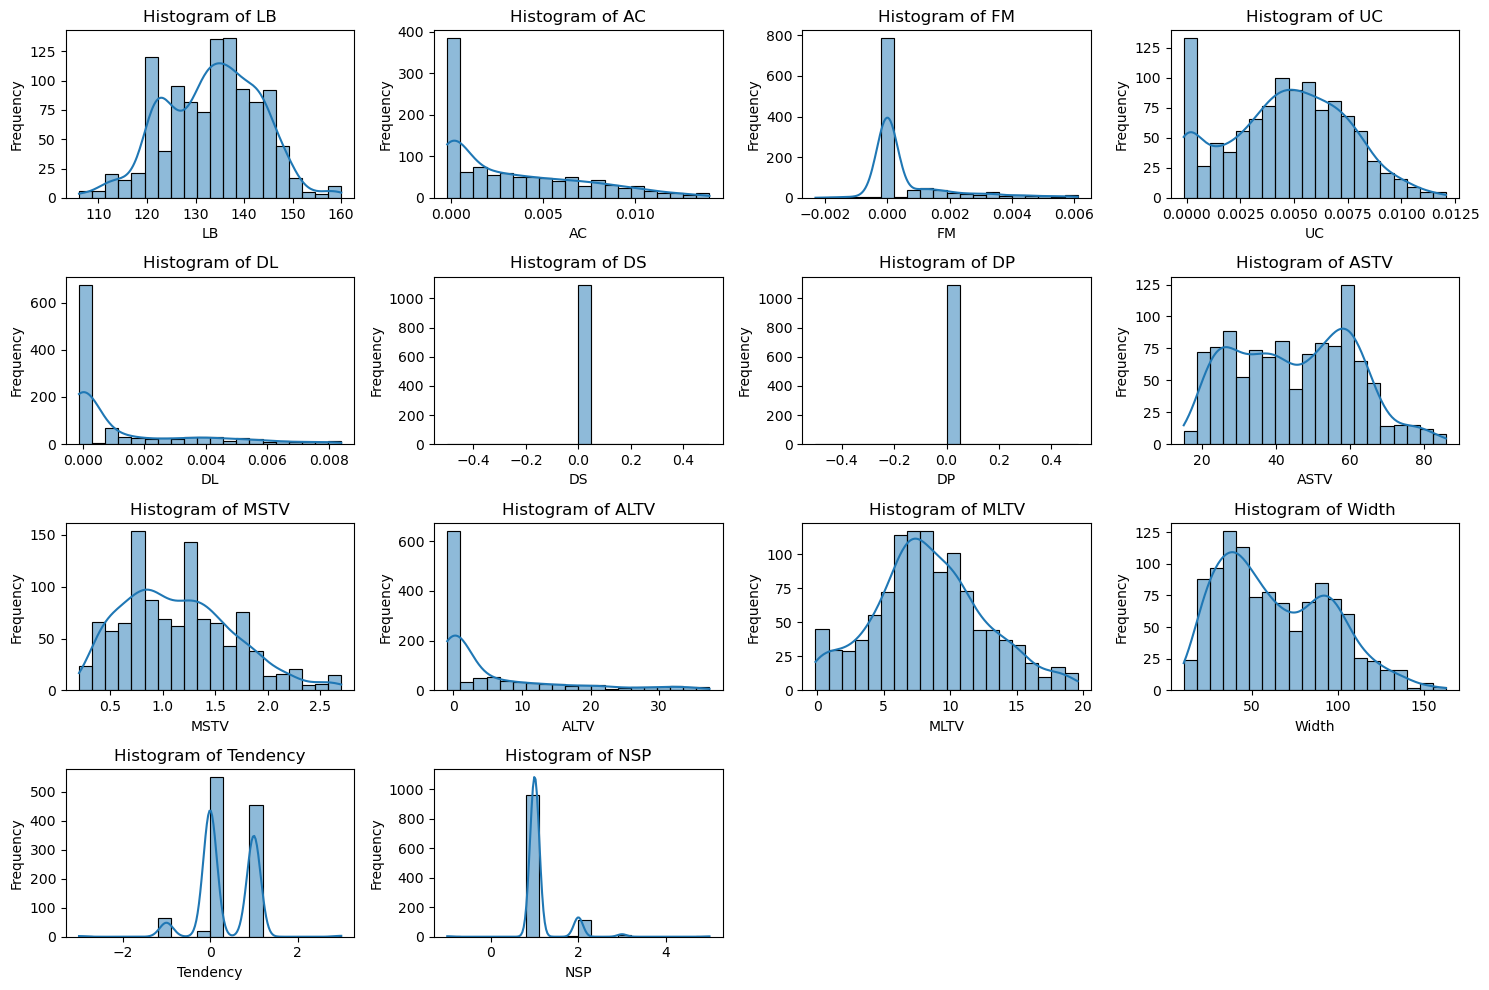

In [42]:
numerical_cols = ['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Tendency','NSP']

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

* Boxplot

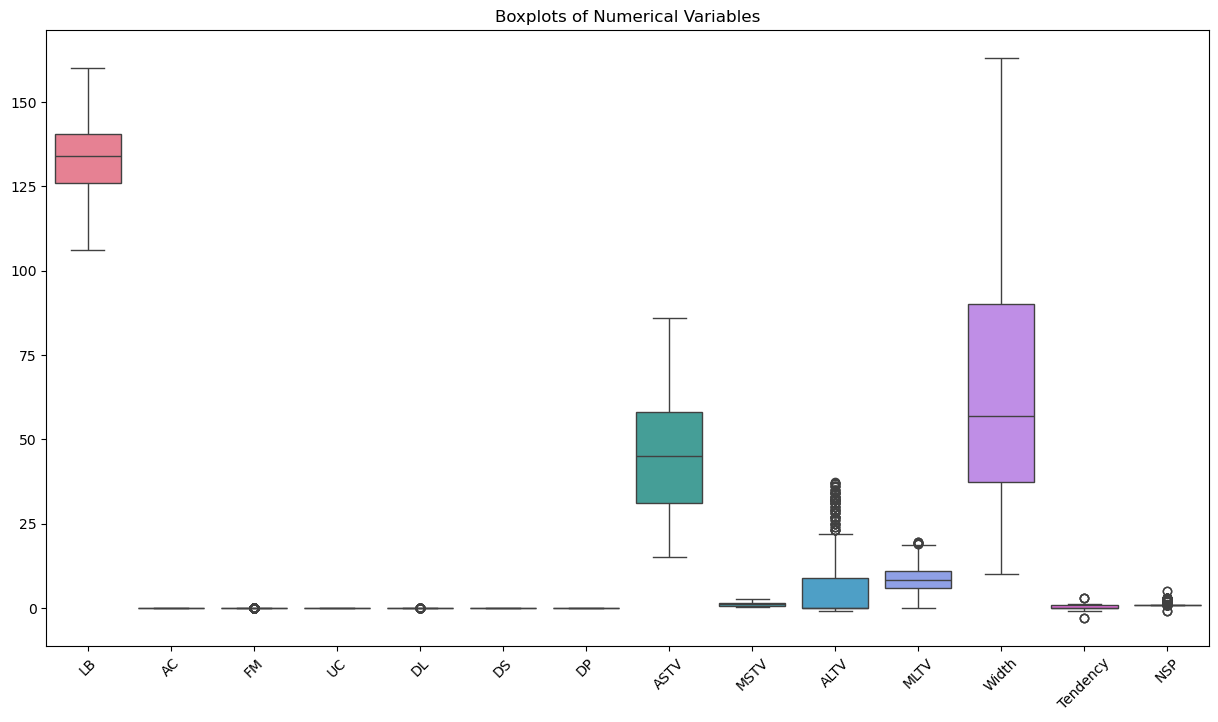

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

* Bar Charts

C:\Users\pprat\AppData\Local\Temp\ipykernel_60448\3986394925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NSP', data=df, palette='viridis')


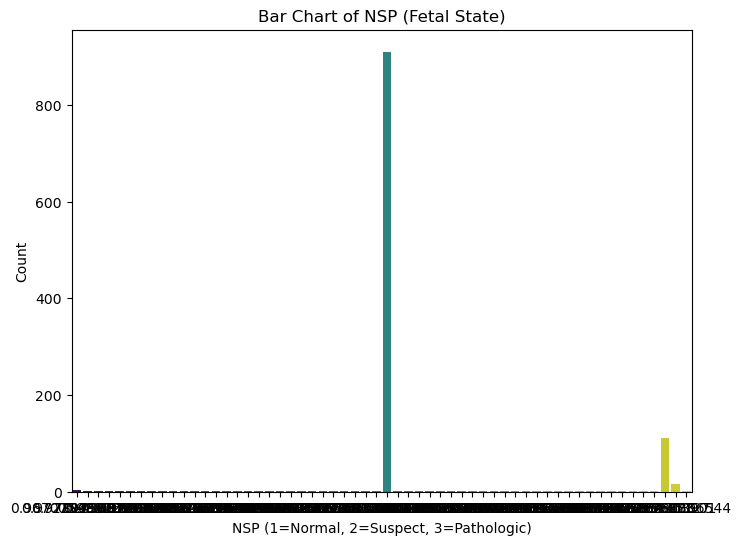

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='NSP', data=df, palette='viridis')
plt.title('Bar Chart of NSP (Fetal State)')
plt.xlabel('NSP (1=Normal, 2=Suspect, 3=Pathologic)')
plt.ylabel('Count')
plt.show()

* Correlation Heatmap

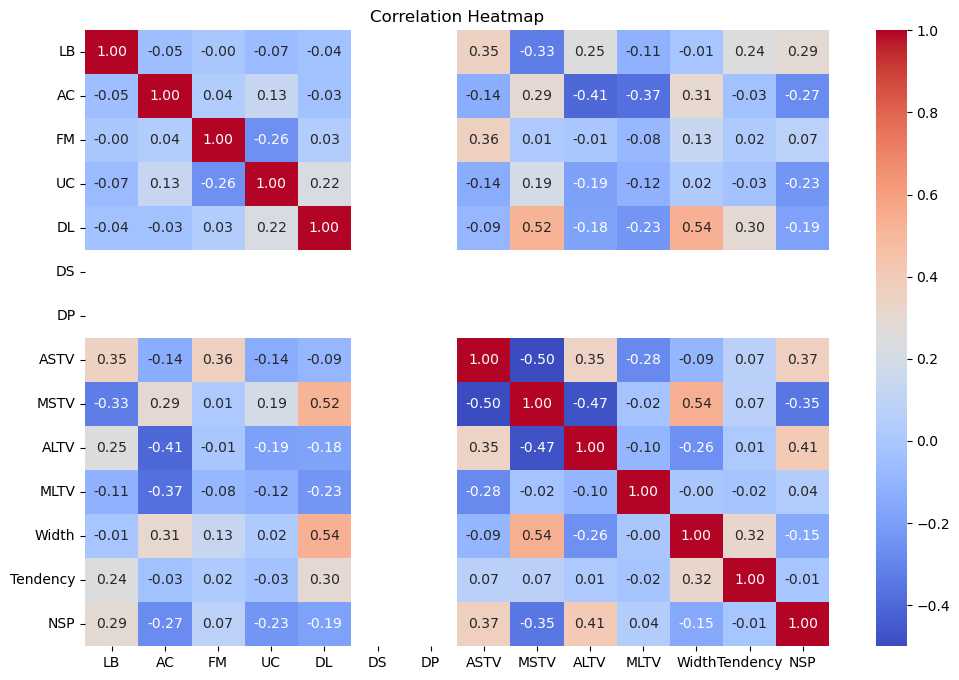

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* Pair Plot

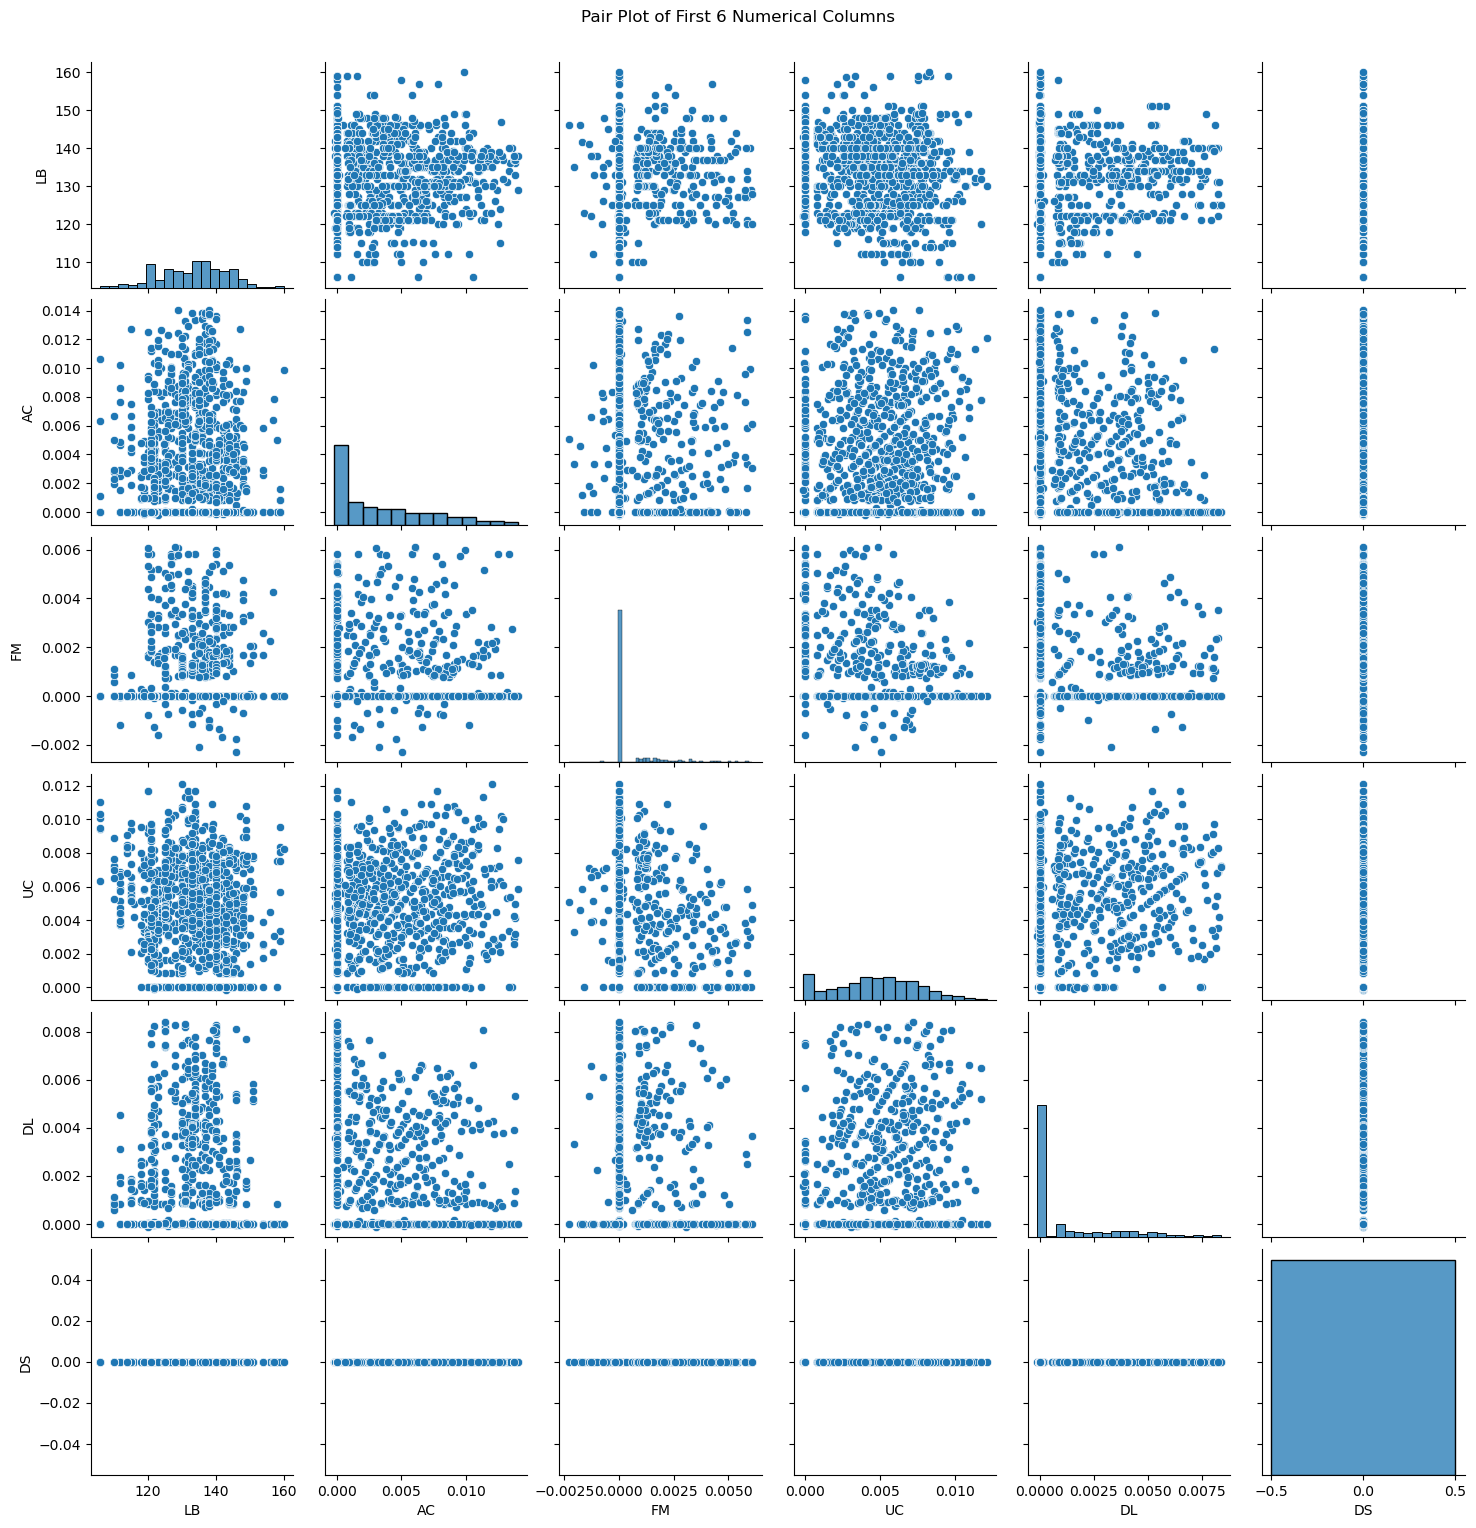

In [49]:

sns.pairplot(df[numerical_cols[:6]])
plt.suptitle("Pair Plot of First 6 Numerical Columns", y=1.02)
plt.show()

* Voilin Plot

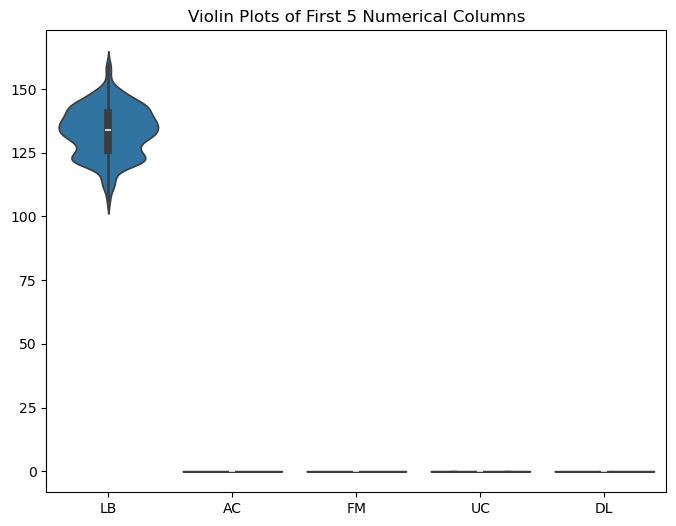

In [51]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df[numerical_cols[:5]])
plt.title("Violin Plots of First 5 Numerical Columns")
plt.show()

# 4. Pattern Recognition and Insights

* Identify correlations between variables and discuss implications.
* Look for trends or patterns in the dataset.

In [52]:
correlations = df.corr()
corr_pairs = (
    correlations.unstack()
    .reset_index()
    .rename(columns={"level_0": "Var1", "level_1": "Var2", 0: "corr"})
)
corr_pairs["abs_corr"] = corr_pairs["corr"].abs()
corr_pairs = corr_pairs[corr_pairs["Var1"] < corr_pairs["Var2"]]

In [ ]:
print("Top 8 strongest correlations:")
display(corr_pairs.sort_values("abs_corr", ascending=False).head(8))

Top 8 strongest correlations:


,Var1,Var2,corr,abs_corr
123,MSTV,Width,0.542198,0.542198
67,DL,Width,0.536970,0.536970
64,DL,MSTV,0.523849,0.523849
106,ASTV,MSTV,-0.500083,0.500083
134,ALTV,MSTV,-0.473303,0.473303
139,ALTV,NSP,0.406084,0.406084
23,AC,ALTV,-0.405232,0.405232
24,AC,MLTV,-0.371348,0.371348


* Summarize key insights and patterns discovered.
* Discuss how findings could impact decision-making or further analyses.

In [56]:
print("=== EDA Summary ===\n")
print("1) Dataset shape:", df.shape)
print("2) Numeric variables examined:", numerical_cols)
print("\n3) Missing values: filled numeric missing values with median.")
print("4) Outliers: detected using IQR. Optionally winsorized (clipped) and saved to cleaned CSV.")
print("\n5) Statistical highlights (sample):")
display(stats_df.sort_values('Std Dev', ascending=False).head(8))

print("\n6) Strongest correlations (top):")
display(corr_pairs.sort_values('abs_corr', ascending=False).head(8))

print("\nRecommendations:")
print("- Investigate variables with strong correlations for potential redundancy.")
print("- If temporal/monitoring data becomes available, analyze trends over time per patient.")
print("- Consider domain-specific thresholds for critical variables (e.g., decelerations) and consult clinical experts for interpretation.")

=== EDA Summary ===

1) Dataset shape: (1095, 14)
2) Numeric variables examined: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']

3) Missing values: filled numeric missing values with median.
4) Outliers: detected using IQR. Optionally winsorized (clipped) and saved to cleaned CSV.

5) Statistical highlights (sample):


,Feature,Mean,Median,Std Dev,Q1 (25%),Q3 (75%),IQR,Min,Max
11,Width,63.7672,57.0,32.1661,37.2152,90.0000,52.7848,10.0000,163.0000
7,ASTV,45.1702,45.0,16.0342,31.0000,58.0000,27.0000,15.0000,86.0000
0,LB,133.4019,134.0,9.7634,126.0000,140.5454,14.5454,106.0000,160.0000
9,ALTV,5.9497,0.0,9.6177,0.0000,9.0000,9.0000,-0.8999,37.3413
10,MLTV,8.4451,8.2,4.1968,5.8000,11.0000,5.2000,-0.1361,19.6000
12,Tendency,0.3607,0.0,0.6331,0.0000,1.0000,1.0000,-3.0000,3.0000
8,MSTV,1.1453,1.1,0.5259,0.7000,1.5000,0.8000,0.2000,2.7000
13,NSP,1.1350,1.0,0.4275,1.0000,1.0000,0.0000,-1.0000,5.0000



6) Strongest correlations (top):


,Var1,Var2,corr,abs_corr
123,MSTV,Width,0.542198,0.542198
67,DL,Width,0.536970,0.536970
64,DL,MSTV,0.523849,0.523849
106,ASTV,MSTV,-0.500083,0.500083
134,ALTV,MSTV,-0.473303,0.473303
139,ALTV,NSP,0.406084,0.406084
23,AC,ALTV,-0.405232,0.405232
24,AC,MLTV,-0.371348,0.371348



Recommendations:
- Investigate variables with strong correlations for potential redundancy.
- If temporal/monitoring data becomes available, analyze trends over time per patient.
- Consider domain-specific thresholds for critical variables (e.g., decelerations) and consult clinical experts for interpretation.
